In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import numpy as np
import warnings
# Ignore warnings
warnings.filterwarnings("ignore")

In [4]:
# lines = False ( default value )
#          assumption is that the entire content of the JSON file represents a single JSON object.
# lines = True
#         each line in the JSON file is treated as a separate JSON object.
data = pd.read_json('Dataset.json', lines=True)

In [5]:
data.head()

,link,headline,category,short_description,authors,date
0,https://www.huffpost.com/entry/covid-boosters-...,Over 4 Million Americans Roll Up Sleeves For O...,U.S. NEWS,Health experts said it is too early to predict...,"Carla K. Johnson, AP",2022-09-23
1,https://www.huffpost.com/entry/american-airlin...,"American Airlines Flyer Charged, Banned For Li...",U.S. NEWS,He was subdued by passengers and crew when he ...,Mary Papenfuss,2022-09-23
2,https://www.huffpost.com/entry/funniest-tweets...,23 Of The Funniest Tweets About Cats And Dogs ...,COMEDY,"""Until you have a dog you don't understand wha...",Elyse Wanshel,2022-09-23
3,https://www.huffpost.com/entry/funniest-parent...,The Funniest Tweets From Parents This Week (Se...,PARENTING,"""Accidentally put grown-up toothpaste on my to...",Caroline Bologna,2022-09-23
4,https://www.huffpost.com/entry/amy-cooper-lose...,Woman Who Called Cops On Black Bird-Watcher Lo...,U.S. NEWS,Amy Cooper accused investment firm Franklin Te...,Nina Golgowski,2022-09-22


In [6]:
data = data.drop(columns = ['link','short_description','authors','date'])

In [7]:
data.head()

,headline,category
0,Over 4 Million Americans Roll Up Sleeves For O...,U.S. NEWS
1,"American Airlines Flyer Charged, Banned For Li...",U.S. NEWS
2,23 Of The Funniest Tweets About Cats And Dogs ...,COMEDY
3,The Funniest Tweets From Parents This Week (Se...,PARENTING
4,Woman Who Called Cops On Black Bird-Watcher Lo...,U.S. NEWS


In [8]:
print("Total Rows = ", data.shape[0])

Total Rows =  209527


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209527 entries, 0 to 209526
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   headline  209527 non-null  object
 1   category  209527 non-null  object
dtypes: object(2)
memory usage: 3.2+ MB


In [10]:
print("Number of duplicate headlines = ", data.duplicated(['headline'], keep = 'last').sum())

Number of duplicate headlines =  1531


In [11]:
#Removing duplicates
#inplace=True: This argument modifies the DataFrame in place, meaning it doesn't
#return a new DataFrame but rather changes the original DataFrame (data) directly.

data.drop_duplicates(['headline'], keep = 'last', inplace = True)

In [12]:
print("Total number of rows after removing duplicates = ",data.shape[0])

Total number of rows after removing duplicates =  207996


In [13]:
data.isnull().sum()

headline    0
category    0
dtype: int64

In [14]:
#Blank headlines
data[data['headline'] == '']

,headline,category
122145,,QUEER VOICES


In [15]:
data = data[~(data['headline'] == '')]

In [16]:
print("Total number of rows after Blank headlines = ",data.shape[0])

Total number of rows after Blank headlines =  207995


In [17]:
#Blank short_descriptions
data[data['category'] == '']

,headline,category


In [18]:
print("Number of Unique categories = ",data['category'].nunique())

Number of Unique categories =  42


In [19]:
data['category'].value_counts()

category
POLITICS          35471
WELLNESS          17888
ENTERTAINMENT     17319
TRAVEL             9873
STYLE & BEAUTY     9320
PARENTING          8733
HEALTHY LIVING     6672
QUEER VOICES       6335
FOOD & DRINK       6335
BUSINESS           5977
COMEDY             5339
SPORTS             5075
BLACK VOICES       4572
HOME & LIVING      4210
PARENTS            3884
THE WORLDPOST      3662
WEDDINGS           3594
CRIME              3557
IMPACT             3474
WOMEN              3448
DIVORCE            3419
WORLD NEWS         3293
MEDIA              2941
WEIRD NEWS         2777
GREEN              2616
WORLDPOST          2577
RELIGION           2567
STYLE              2244
SCIENCE            2204
TASTE              2090
TECH               2049
MONEY              1754
ARTS               1505
FIFTY              1401
GOOD NEWS          1396
U.S. NEWS          1377
ENVIRONMENT        1372
ARTS & CULTURE     1338
COLLEGE            1143
LATINO VOICES      1129
CULTURE & ARTS     1052
EDUCATI

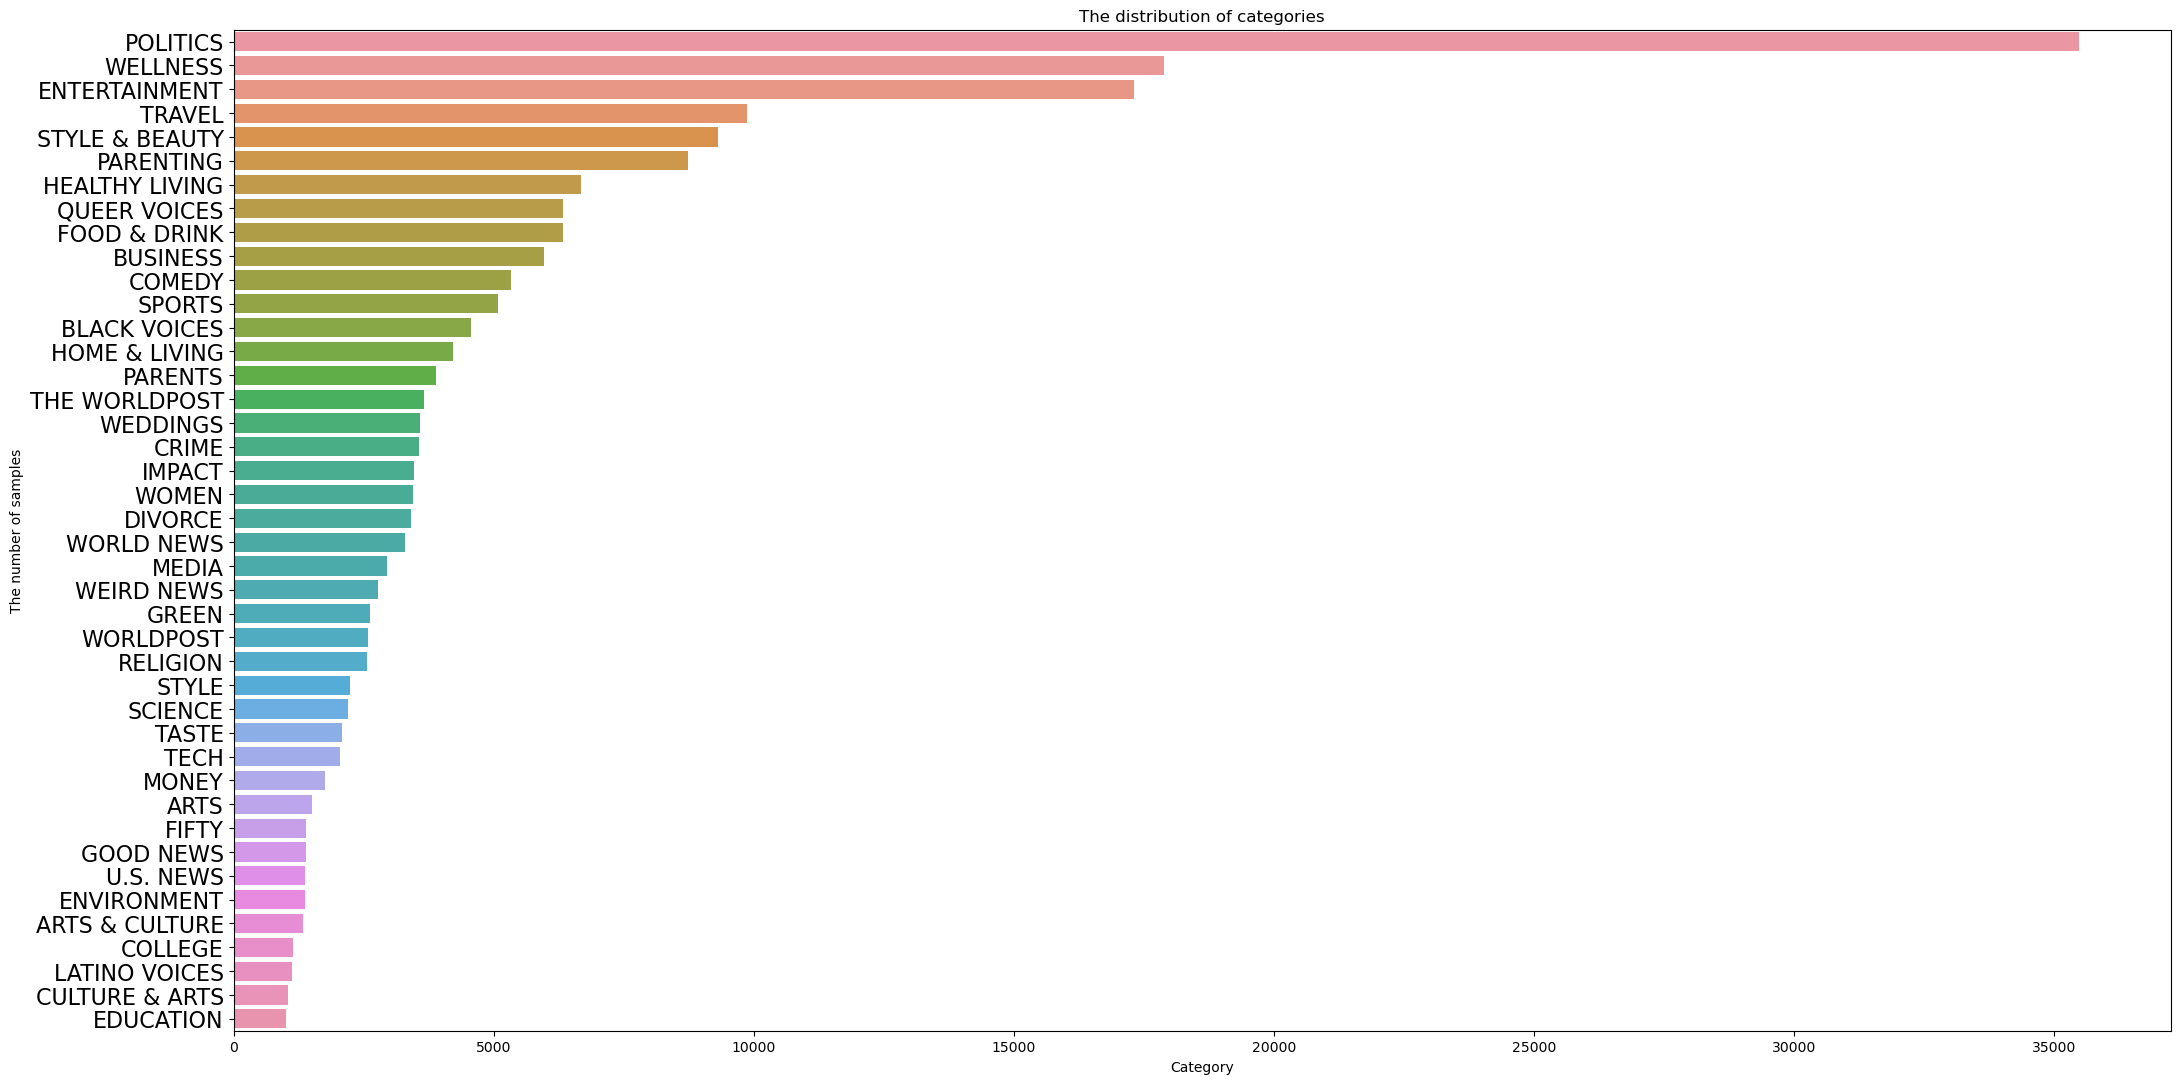

In [20]:
plt.figure(figsize=(25,13))
sns.barplot(y=data['category'].value_counts().index,x=data['category'].value_counts().values)
plt.title("The distribution of categories")
plt.xlabel("Category")
plt.ylabel("The number of samples")

plt.yticks(rotation=0,fontsize = 16)
plt.show()

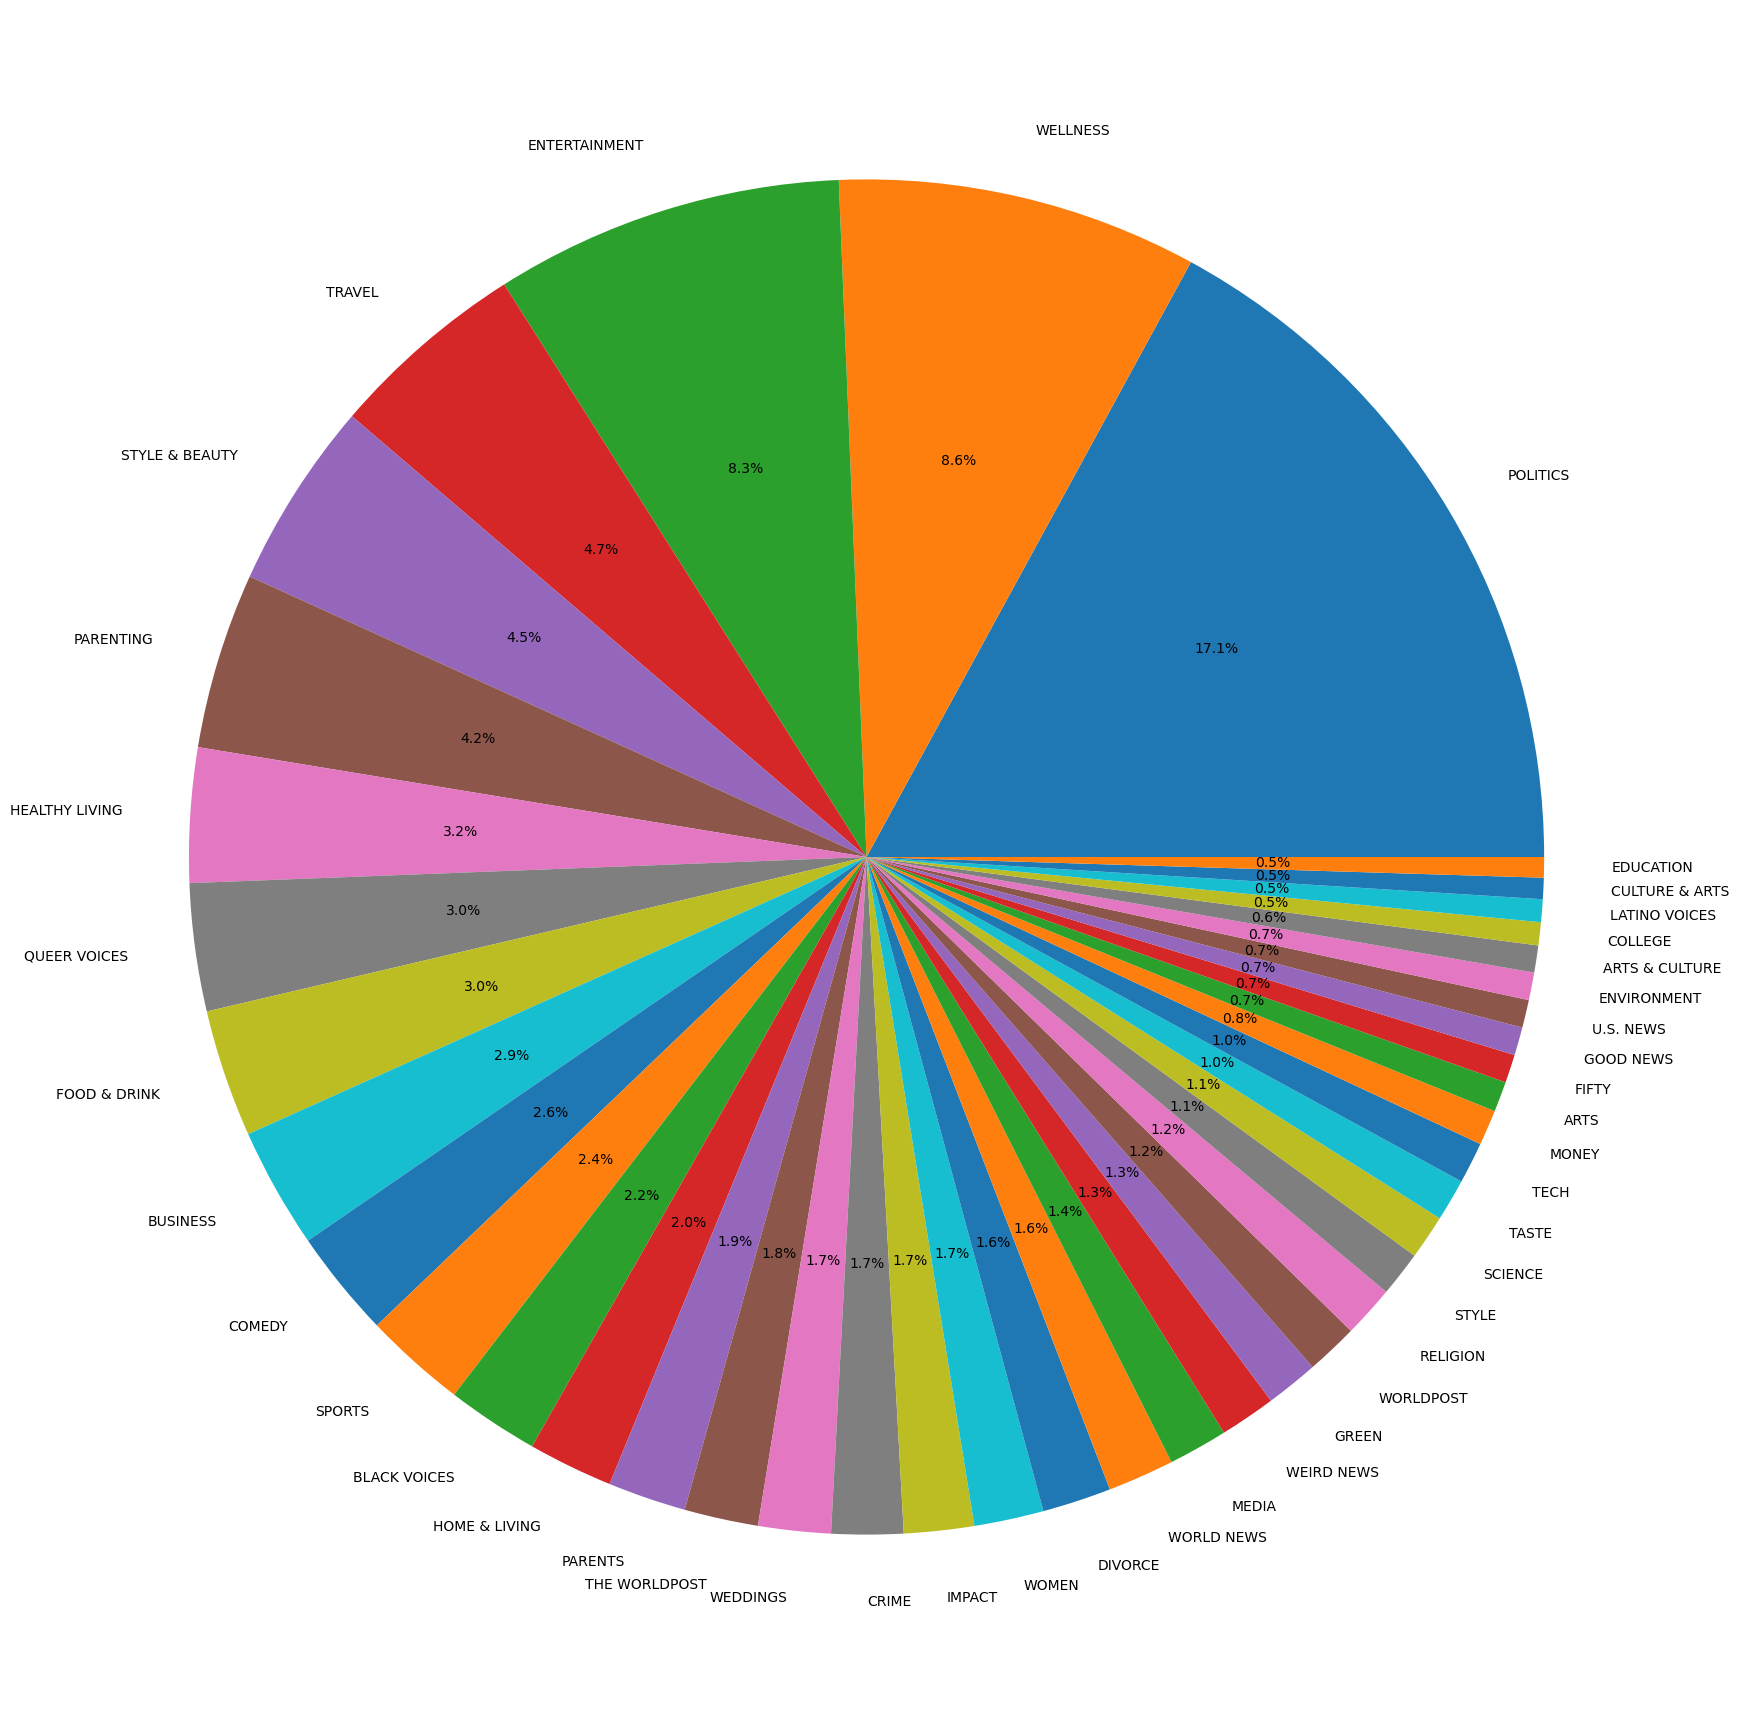

In [21]:
plt.figure(figsize=(22,22))
plt.pie(data['category'].value_counts().values, autopct="%1.1f%%", labels=data[
    'category'].value_counts().index)
plt.show()

In [22]:
data['headline_len'] = data['headline'].apply(lambda x: len(x))
data.head()

,headline,category,headline_len
0,Over 4 Million Americans Roll Up Sleeves For O...,U.S. NEWS,76
1,"American Airlines Flyer Charged, Banned For Li...",U.S. NEWS,89
2,23 Of The Funniest Tweets About Cats And Dogs ...,COMEDY,69
3,The Funniest Tweets From Parents This Week (Se...,PARENTING,56
4,Woman Who Called Cops On Black Bird-Watcher Lo...,U.S. NEWS,77


In [23]:
data.groupby('category')['headline_len'].mean().reset_index().sort_values(
    by='headline_len',ascending=False)

,category,headline_len
35,U.S. NEWS,68.381990
40,WORLD NEWS,65.662921
1,ARTS & CULTURE,65.198057
19,LATINO VOICES,65.023915
10,ENTERTAINMENT,64.662798
30,STYLE & BEAUTY,64.496781
24,POLITICS,64.384060
2,BLACK VOICES,64.195101
14,GOOD NEWS,64.073782
6,CRIME,63.778465


{'whiskers': [<matplotlib.lines.Line2D at 0x27e3eb28f50>,
 'caps': [<matplotlib.lines.Line2D at 0x27e3ead88d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x27e3ea64450>],
 'medians': [<matplotlib.lines.Line2D at 0x27e3eb340d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x27e3eb2a050>],
 'means': []}

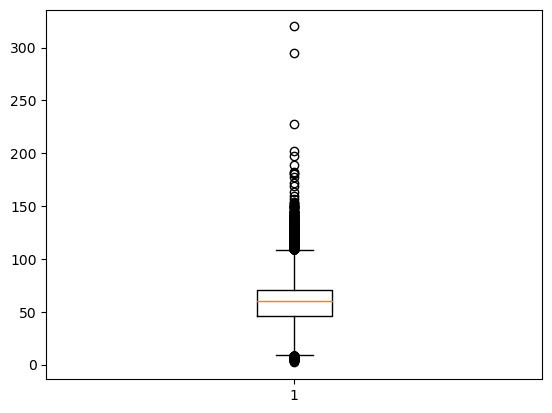

In [24]:
plt.boxplot(data['headline_len'])

In [25]:
data.reset_index(inplace = True, drop = True)

In [26]:
count = 0
max_threshold = data['headline_len'].std() * 3 + data['headline_len'].mean()
min_threshold = abs(data['headline_len'].mean() - data['headline_len'].std() * 3 )

for num in data['headline_len']:
    if num > max_threshold or num < min_threshold:
        count += 1
print("The total outliers are = ",count)

The total outliers are =  487


In [27]:
data = data[(data['headline_len'] < max_threshold) & (data['headline_len'] > min_threshold )]
data.shape

(207508, 3)

{'whiskers': [<matplotlib.lines.Line2D at 0x27e4e5e6d50>,
 'caps': [<matplotlib.lines.Line2D at 0x27e4e5ec590>,
 'boxes': [<matplotlib.lines.Line2D at 0x27e4e5a2910>],
 'medians': [<matplotlib.lines.Line2D at 0x27e4e5ee110>],
 'fliers': [<matplotlib.lines.Line2D at 0x27e4e5c5410>],
 'means': []}

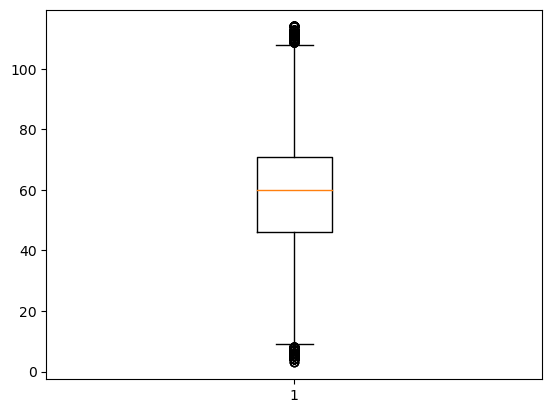

In [28]:
plt.boxplot(data['headline_len'])

In [29]:
data = data.drop(columns = ['headline_len'])

In [30]:
data.to_json('Cleaned_Data.json', orient='records', lines=True)